In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from os import listdir

In [25]:
def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

In [41]:
def aggregateInterval (nclient, mode):
    # es  mode = [skeleton, tag, multi]
    path = "stored_log/"+mode+"/"+str(nclient)+"/interval/"
    list_files = [path+file for file in listdir(path) if not file.startswith('.')]
    
    lenghts = []
    for file in list_files:
        lenghts.append(file_len(file))
    min_len = min(lenghts) - 1
    log = pd.read_csv(list_files[0], header=None).values[:min_len]
    performanceAggr = log[:,1]
    for file in list_files[1:]:
        log = pd.read_csv(file, header=None).values[:min_len]
        performance = log[:,1]
        performanceAggr = np.column_stack((performanceAggr, performance))
    
    if (len(performanceAggr.shape)>1):
        avgAggr = np.mean(performanceAggr, axis = 1)
        stdAggr = scipy.stats.sem(performanceAggr, axis = 1)
        return [avgAggr,stdAggr,min_len]
    
    else:
        return [performanceAggr,np.zeros(min_len),min_len]
    

In [45]:
def printAggr (avgAggr, stdAggr, length):
    plt.plot(np.arange(0.5, length/2+0.5, 0.5),avgAggr, linewidth=3.0)
    plt.fill_between(np.arange(0.5, length/2+0.5, 0.5), avgAggr + stdAggr/2, avgAggr - stdAggr/2, alpha=0.5)

In [46]:
def printPlot(skeleton, multi, tag, nclient):
    [avgSkeleton, stdSkeleton, minSkeleton] = skeleton
    [avgMulti, stdMulti, minMulti] = multi
    [avgTag, stdTag, minTag] = tag
    plt.figure(figsize=(10,8))
    plt.grid()
    printAggr(avgMulti[:], stdMulti[:], len(avgMulti))
    printAggr(avgTag[:], stdTag[:], len(avgTag))
    printAggr(avgSkeleton[:], stdSkeleton[:],len(avgSkeleton))
    plt.ylabel("Throughput [ops]", size = 15)
    plt.xlabel("time [s]", size = 15)
    plt.title("Number of client: " + str(nclient)+"\n", size = 15)
    plt.legend(["Multithread","Tag Cleaning", "Skeleton"],loc="lower right", fontsize = 15)
    plt.show()

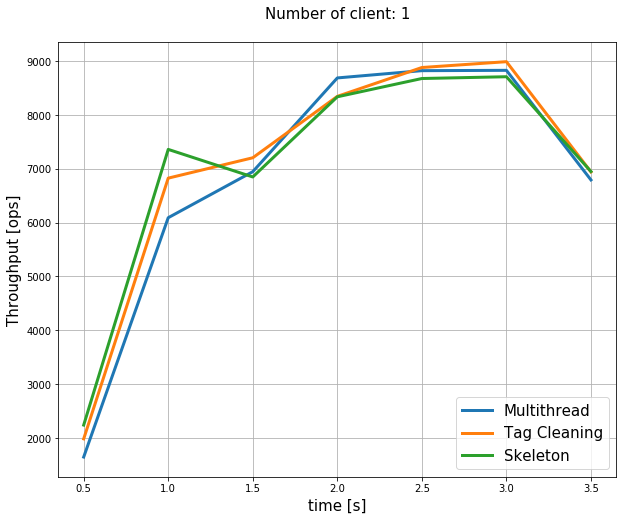

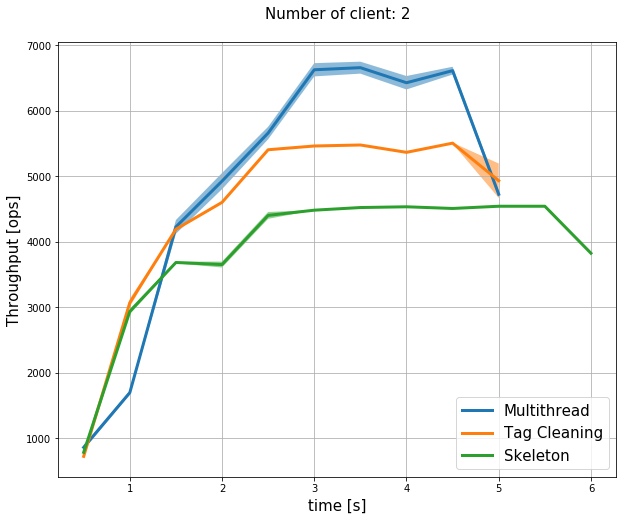

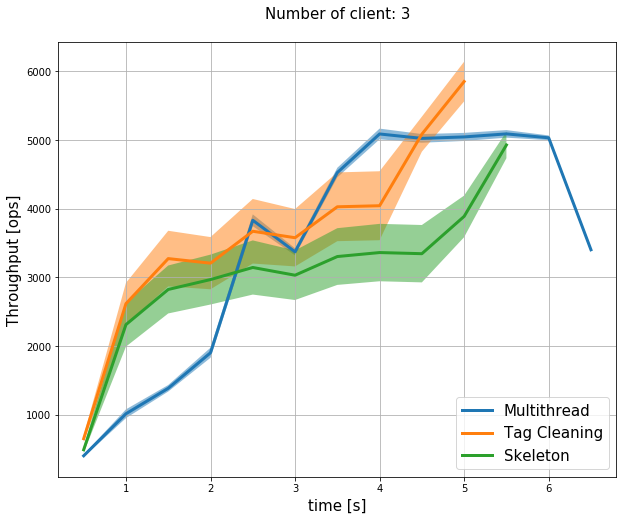

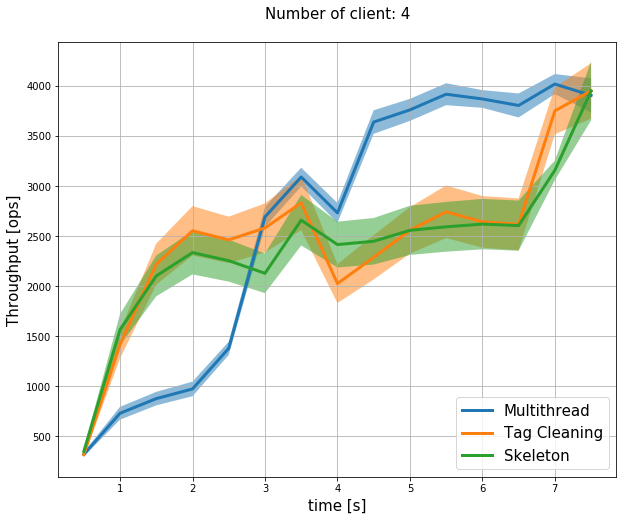

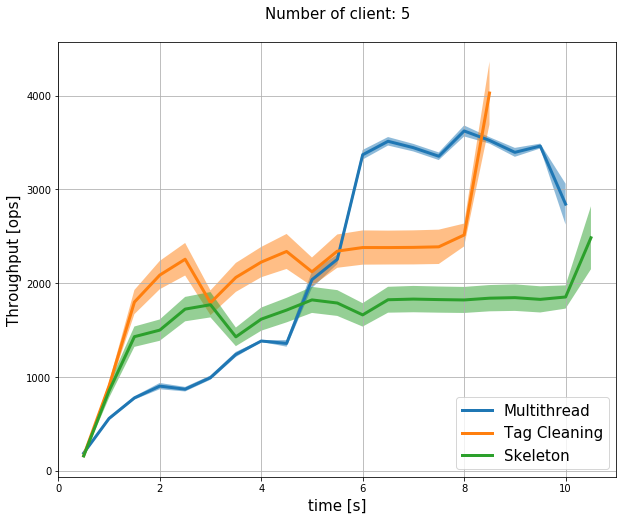

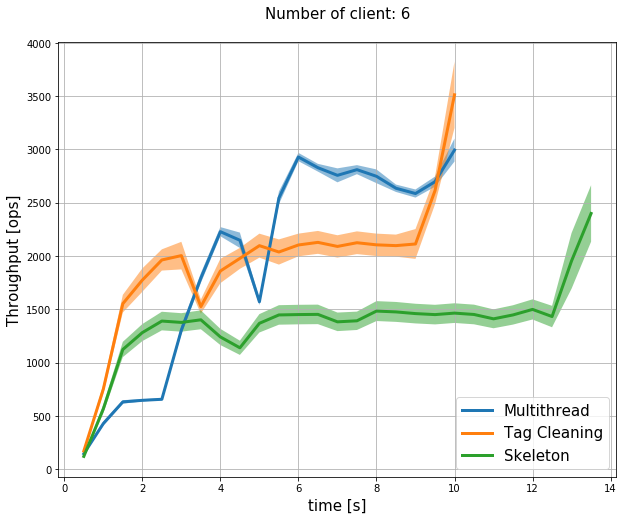

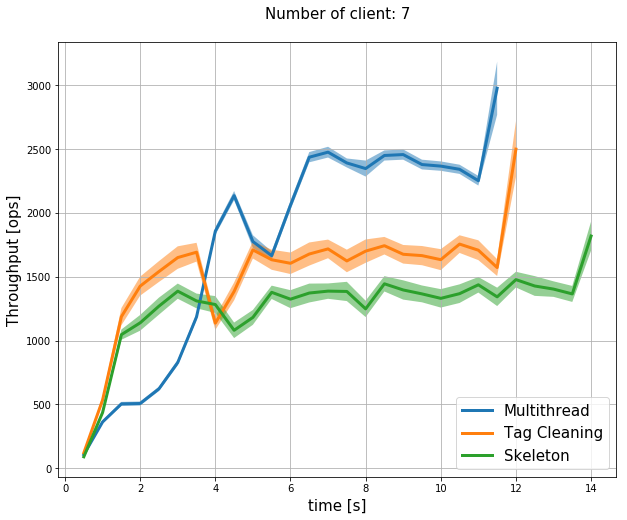

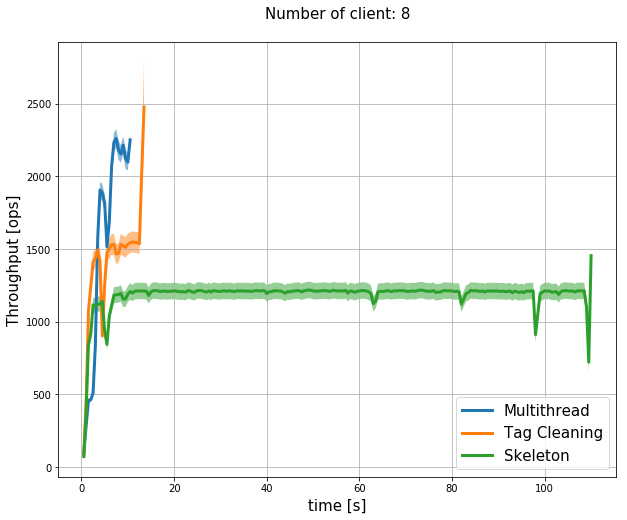

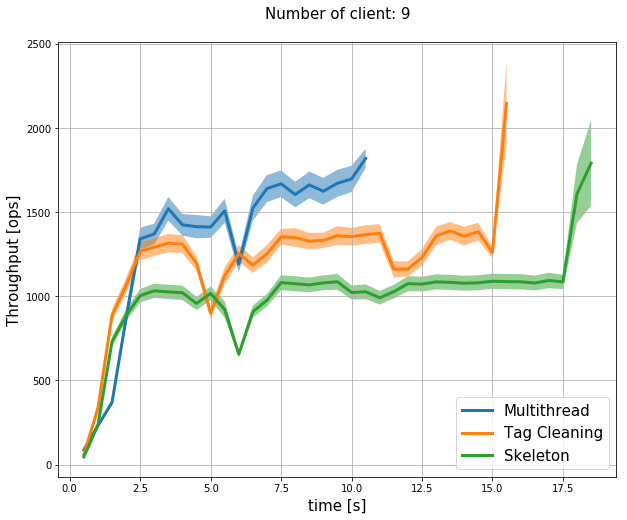

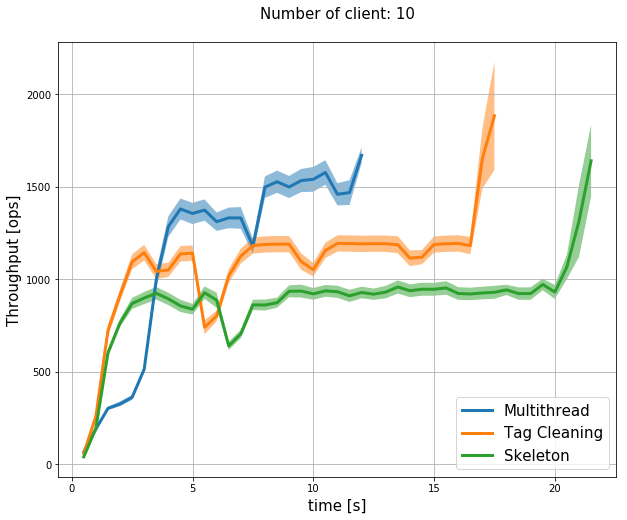

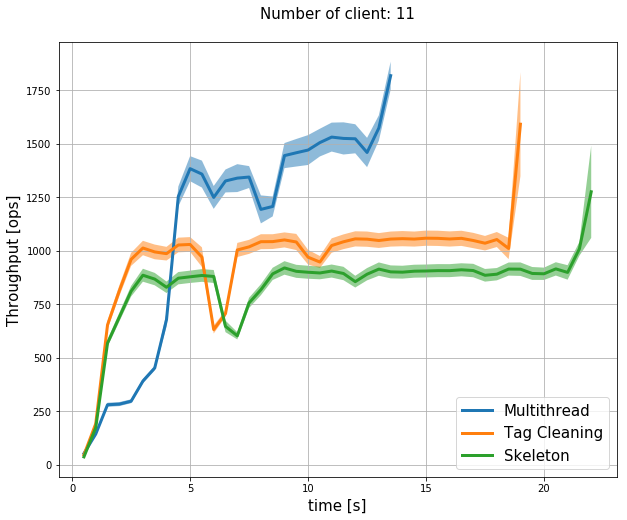

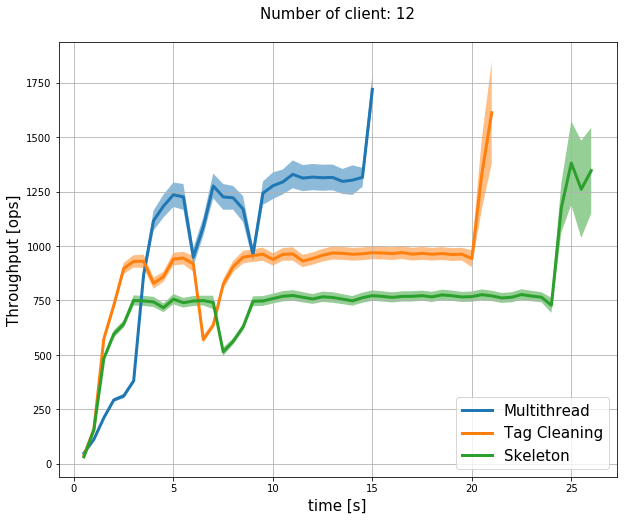

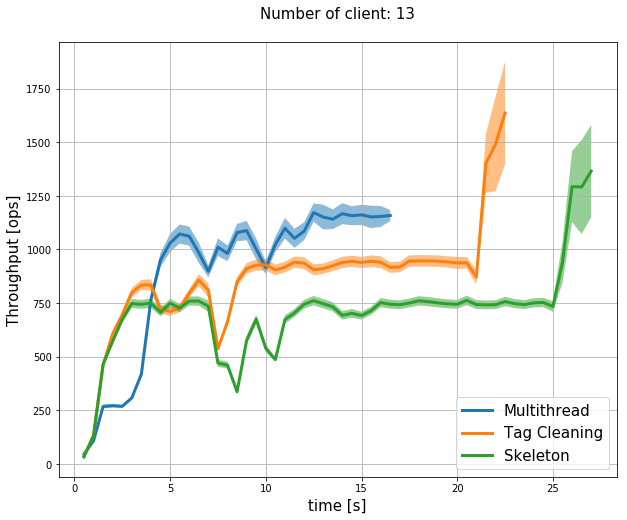

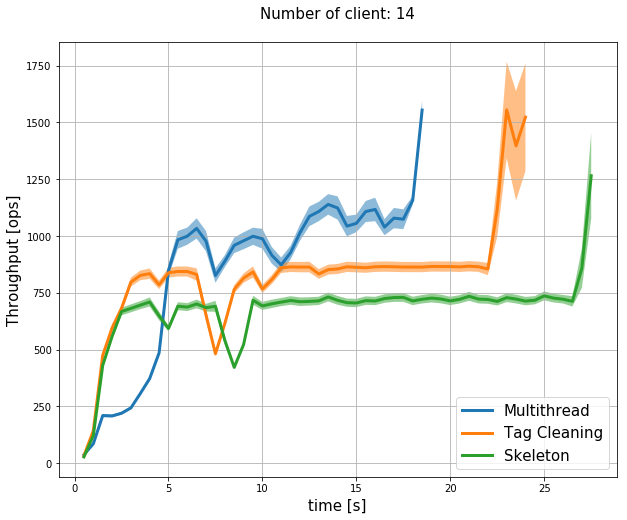

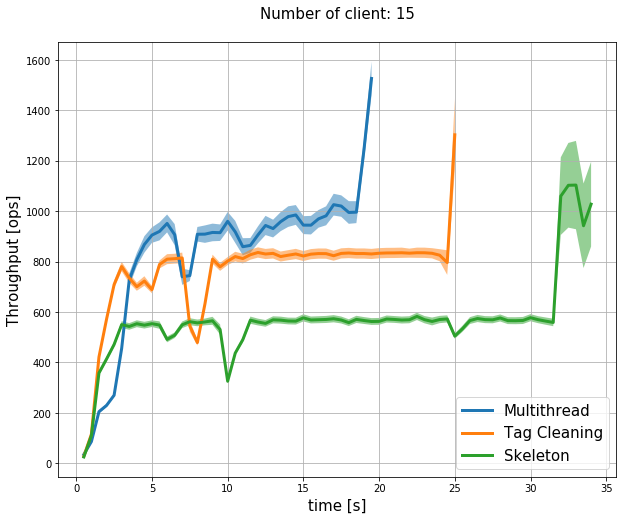

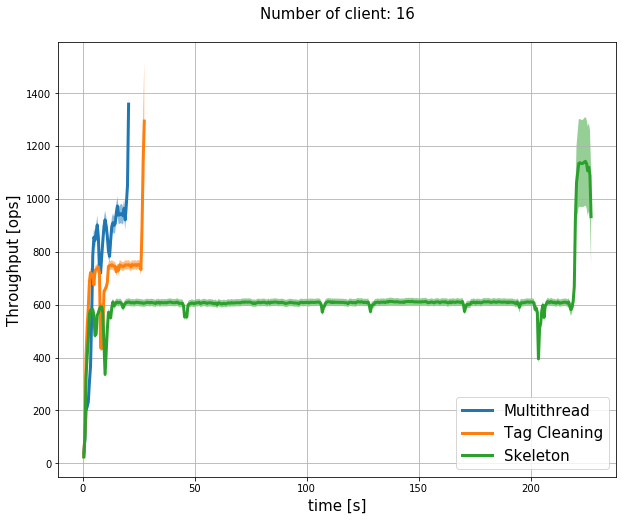

In [47]:
# skeleton = aggregateInterval(16,"skeleton")
# multi = aggregateInterval(16,"multi")
# tag = aggregateInterval(16,"tag")    

# printPlot(skeleton, multi, tag, nclient=16)

for i in range (1,17):
    skeleton = aggregateInterval(i,"skeleton")
    multi = aggregateInterval(i,"multi")
    tag = aggregateInterval(i,"tag")
    printPlot(skeleton, multi, tag, nclient=i)

In [7]:
def aggregatePercent (path):
    list_files = [path+file for file in listdir(path) if not file.startswith('.')]
    log = pd.read_csv(list_files[0]).values[:maxPercent]
    performanceAggr = log[:,1]
    for file in list_files[1:]:
        log = pd.read_csv(file).values[:maxPercent]
        performance = log[:,1]
        performanceAggr = np.column_stack((performanceAggr, performance))
    
    if (len(performanceAggr.shape)>1):
        avgAggr = np.mean(performanceAggr, axis = 1)
        stdAggr = np.std(performanceAggr, axis = 1)
        return [avgAggr,stdAggr]
    
    else:
        return [performanceAggr,np.zeros(maxPercent)]

In [149]:
def printOnePercent (avgAggr, stdAggr, label):
    plt.plot(range(1,maxPercent+1),avgAggr, linewidth=3.0, label=label)
    plt.fill_between(range(1,maxPercent+1), avgAggr + stdAggr/2, avgAggr - stdAggr/2, alpha=0.5)

In [173]:
def printPlotPercent(skeleton, multi, tag, title):
    [avgSkeleton, stdSkeleton] = skeleton
    [avgMulti, stdMulti] = multi
    [avgTag, stdTag] = tag
    plt.figure(figsize=(10,8))
    plt.grid()
    printOnePercent(avgMulti, stdMulti, "Multithread")
    printOnePercent(avgTag, stdTag, "Tag Cleaning")
    printOnePercent(avgSkeleton, stdSkeleton,"Skeleton")
    maxY = int(max(np.max(avgSkeleton+stdSkeleton/2),
                   np.max(avgMulti+stdMulti/2),
                   np.max(avgTag+stdTag/2)))
    plt.ylabel("Response time [ms]", size = 15)
    plt.xlabel("Percentile", size = 15)
    plt.xticks(range(0,101,10))
    plt.title(title, size = 15)
    plt.legend(loc="upper left", fontsize = 15)
    plt.show()

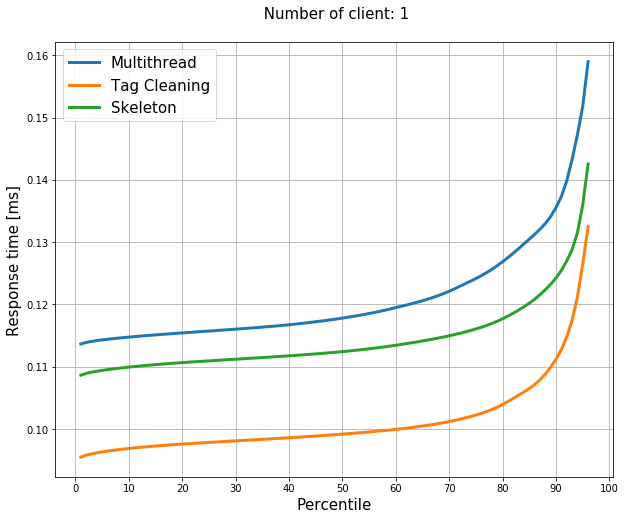

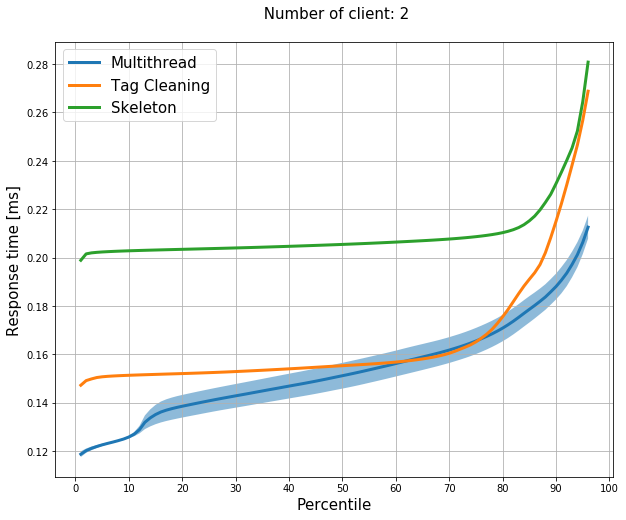

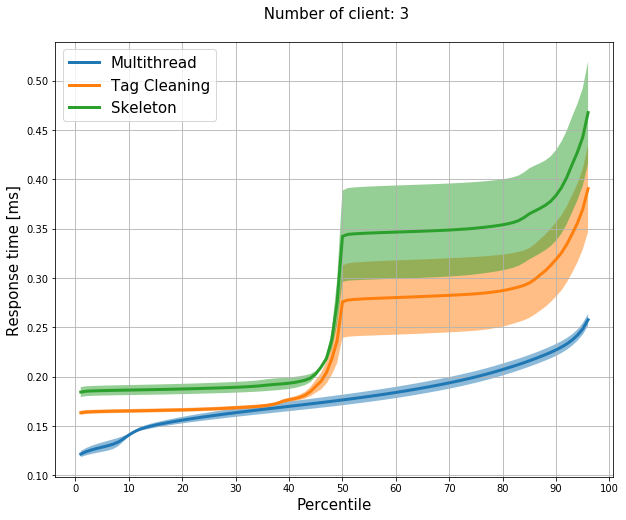

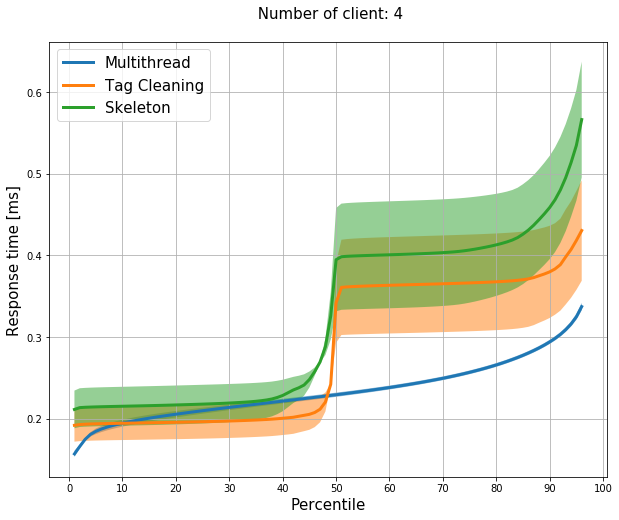

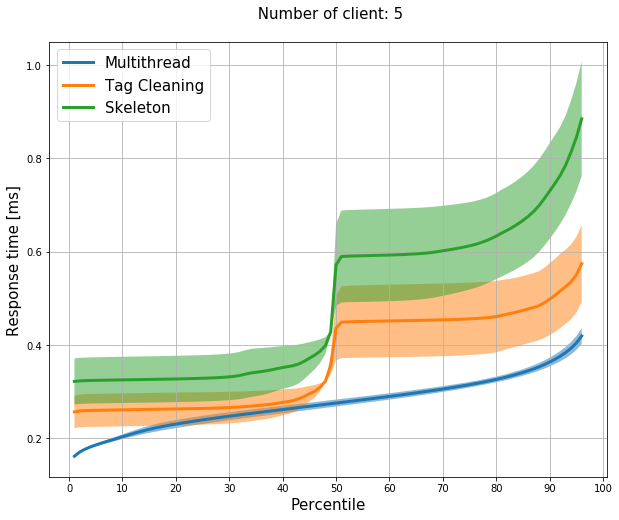

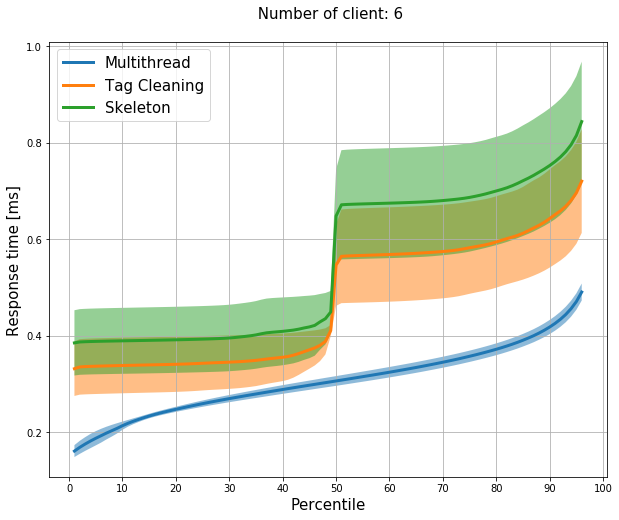

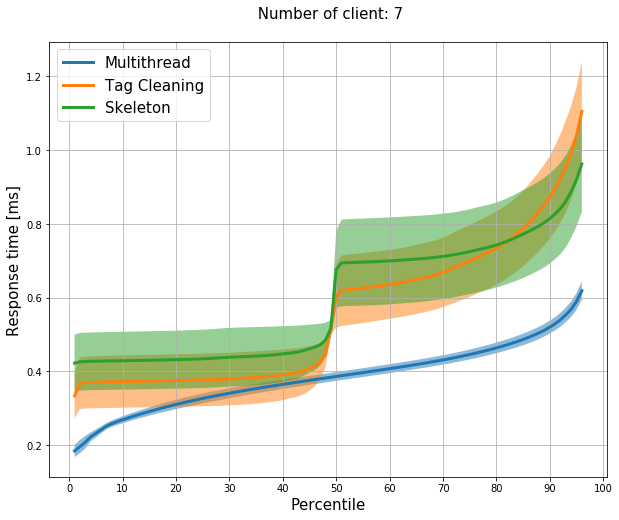

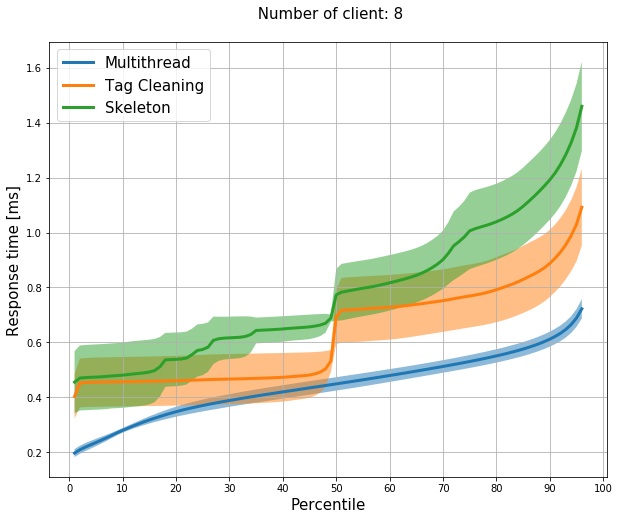

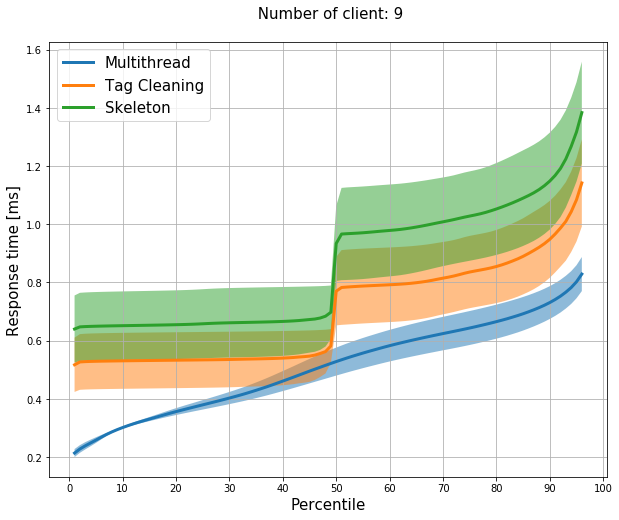

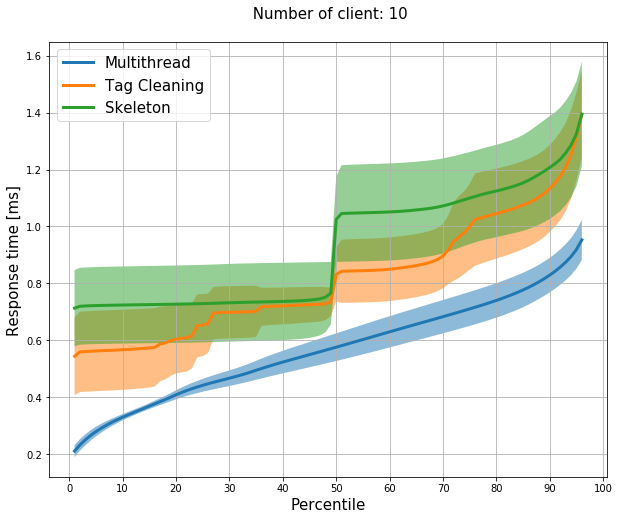

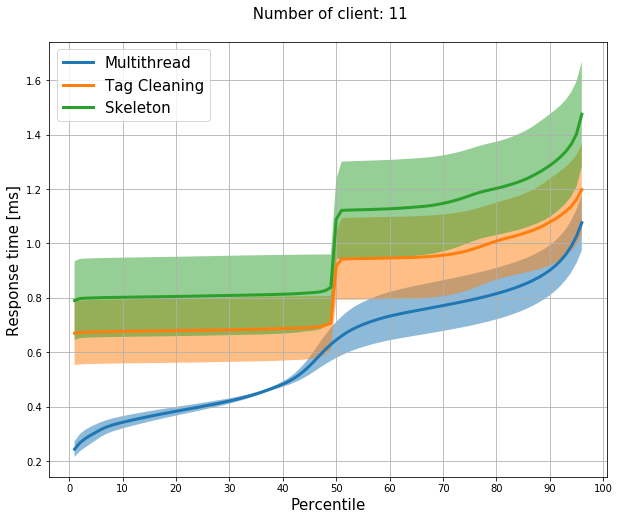

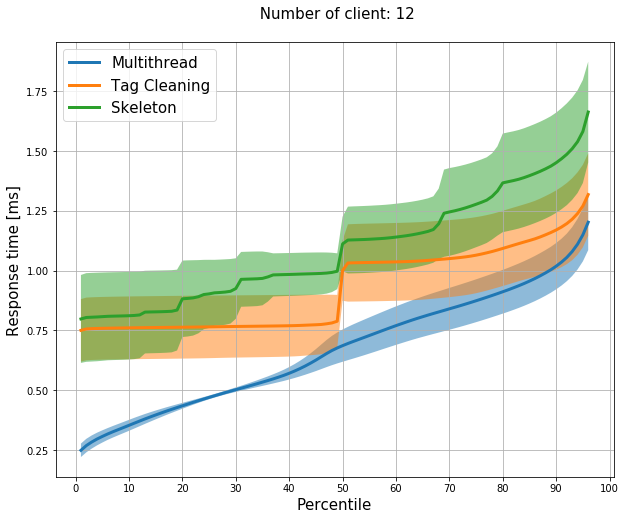

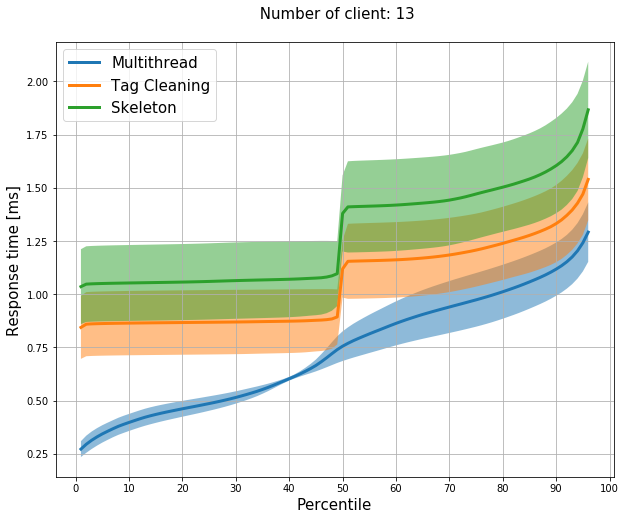

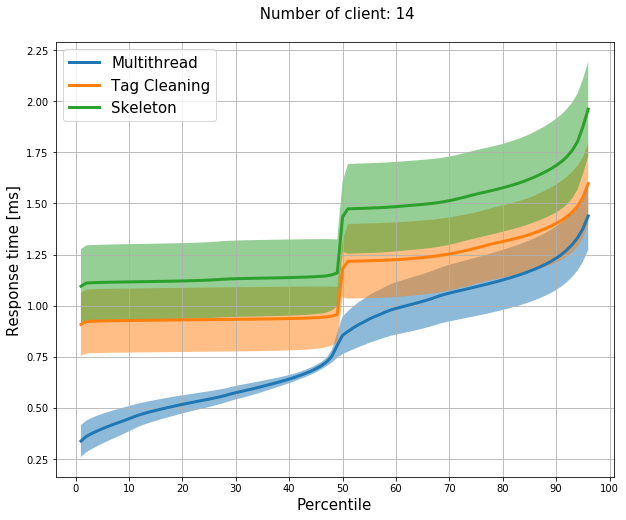

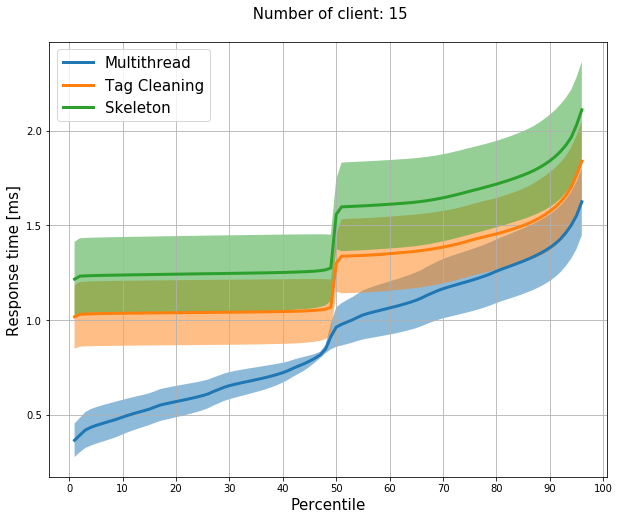

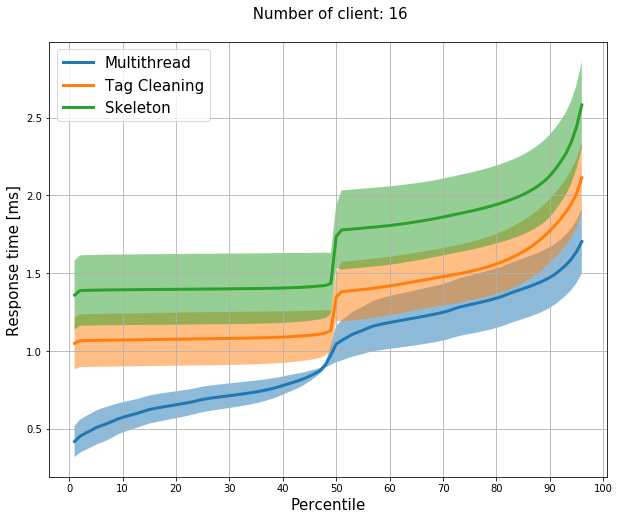

In [174]:
maxPercent = 96
for i in range (1,17):
    skeleton = aggregatePercent("stored_log/skeleton/"+str(i)+"/percentile/")
    multi = aggregatePercent("stored_log/multi/"+str(i)+"/percentile/")
    tag = aggregatePercent("stored_log/tag/"+str(i)+"/percentile/")
    printPlotPercent(skeleton, multi, tag," Number of client: " + str(i)+"\n")

In [176]:
def printServerPercent(reading, counting, cleaning, title):
    plt.figure(figsize=(10,8))
    plt.grid()
    plt.plot(range(1,maxPercentServer+1), reading, linewidth=3.0, label="reading")
    plt.plot(range(1,maxPercentServer+1), counting, linewidth=3.0, label="counting")
    plt.plot(range(1,maxPercentServer+1), cleaning, linewidth=3.0, label="cleaning")
    maxY = int(max(np.max(reading),
                   np.max(counting),
                   np.max(cleaning)))
    plt.ylabel("Response time [ms]", size = 15)
    plt.xlabel("Percentile", size = 15)
    plt.xticks(range(0,101,10))
    plt.title(title, size = 15)
    plt.legend(loc="upper left", fontsize = 15)
    plt.show()

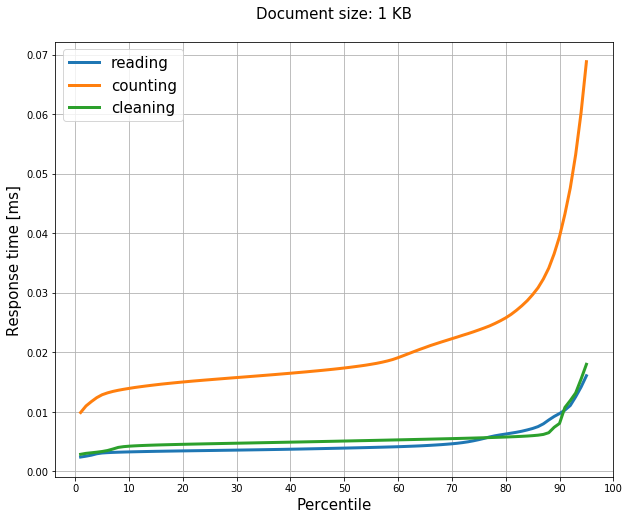

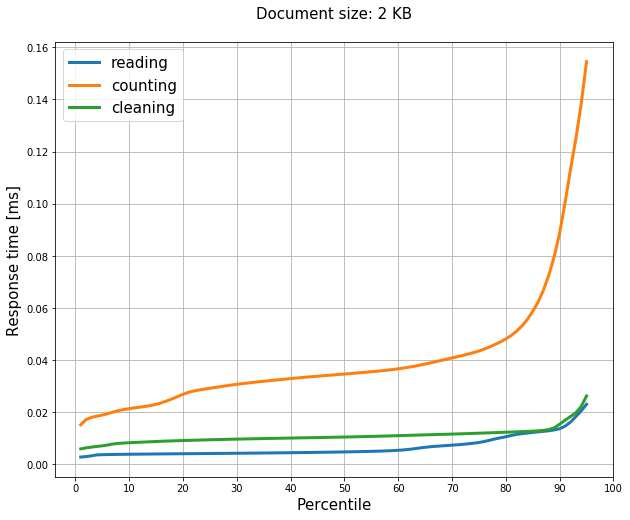

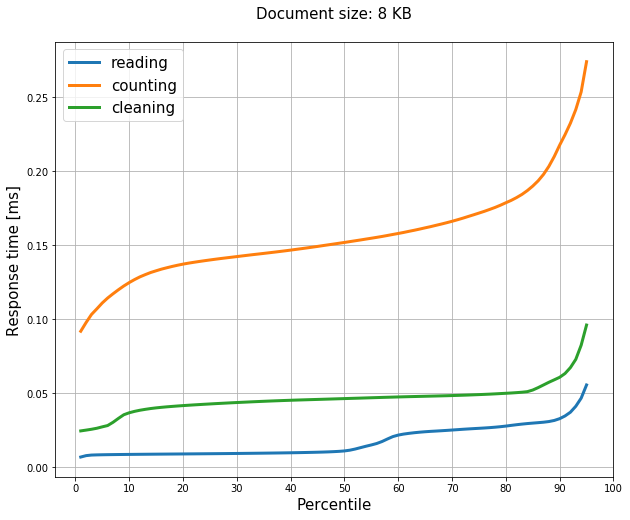

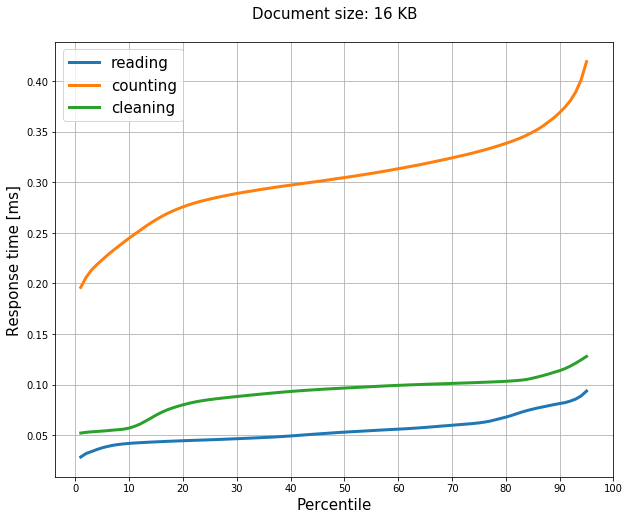

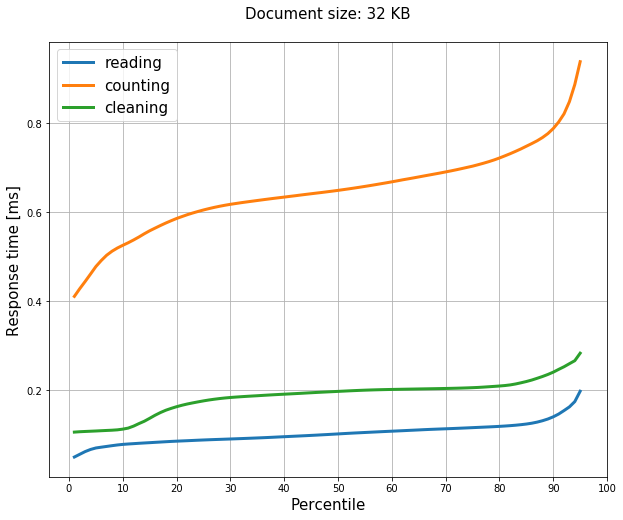

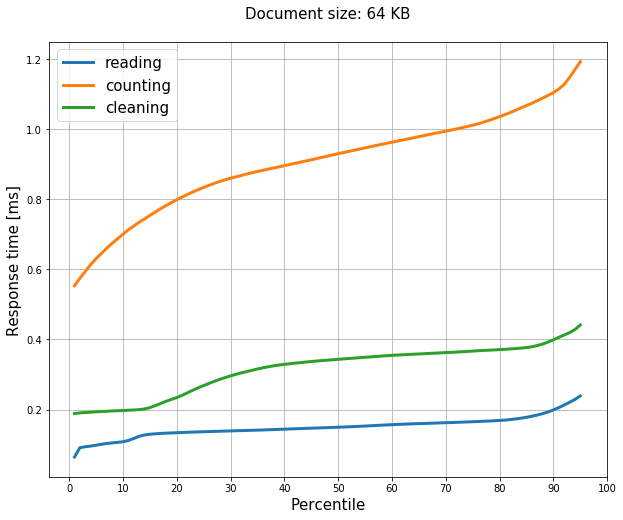

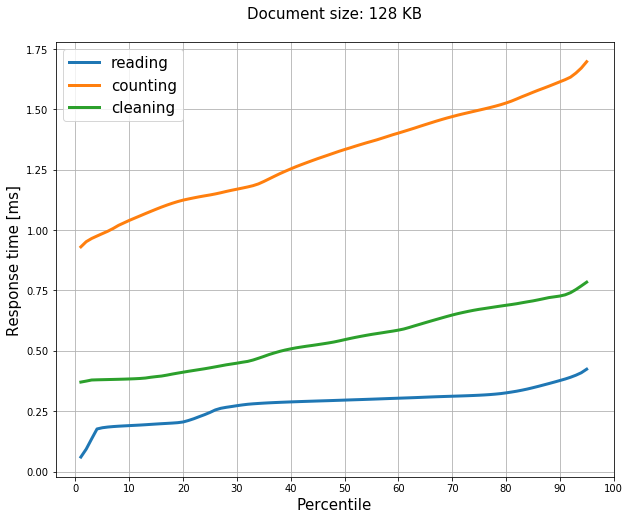

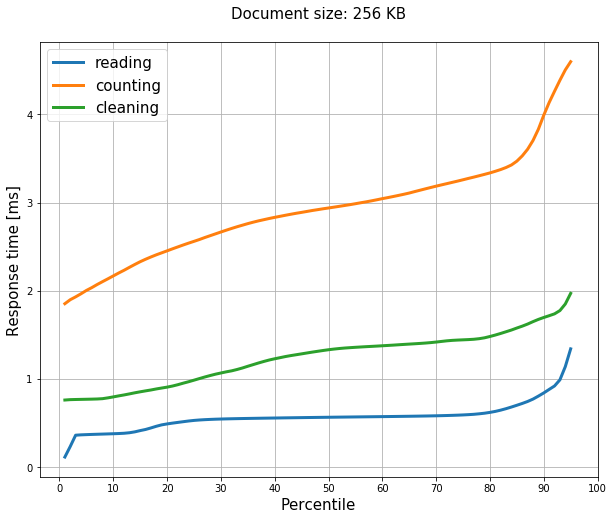

In [192]:
maxPercentServer = 95
print_log = False
for i in [1,2,8,16,32,64,128,256]:
    reading = pd.read_csv("size_log/"+str(i)+"/server/readingtime.csv",header=None,skiprows=1,sep=',').values[:maxPercentServer,1]
    counting = pd.read_csv("size_log/"+str(i)+"/server/countingtime.csv",header=None,skiprows=1,sep=',').values[:maxPercentServer,1]
    cleaning = pd.read_csv("size_log/"+str(i)+"/server/cleaningtime.csv",header=None,skiprows=1,sep=',').values[:maxPercentServer,1]
    if (print_log):
        printServerPercent(np.log(reading), np.log(counting), np.log(cleaning), "Document size: "+str(i)+" KB\n")
    else:
        printServerPercent(reading, counting, cleaning, "Document size: "+str(i)+" KB\n")

In [189]:
def printPlotPercentSingleClient(client, title):
    [avgClient, stdClient] = client
    plt.figure(figsize=(10,8))
    plt.grid()
    printOnePercent(avgClient, stdClient,"Client")
    maxY = int(np.max(avgClient+stdClient/2))
    plt.ylabel("Response time [ms]", size = 15)
    plt.xlabel("Percentile", size = 15)
    plt.xticks(range(0,101,10))
    plt.title(title, size = 15)
    plt.legend(loc="upper left", fontsize = 15)
    plt.show()

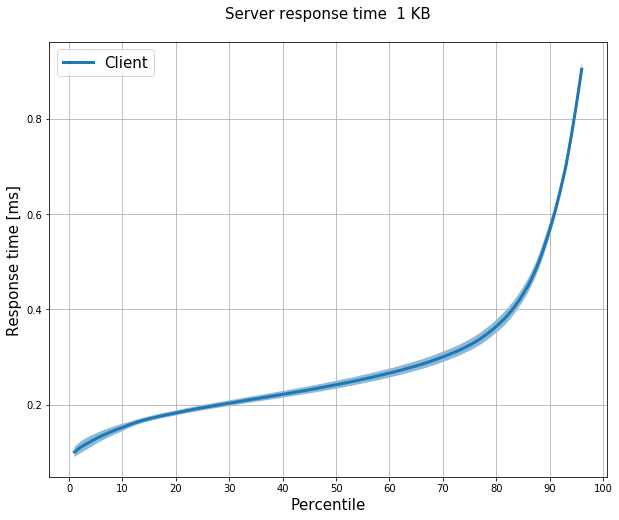

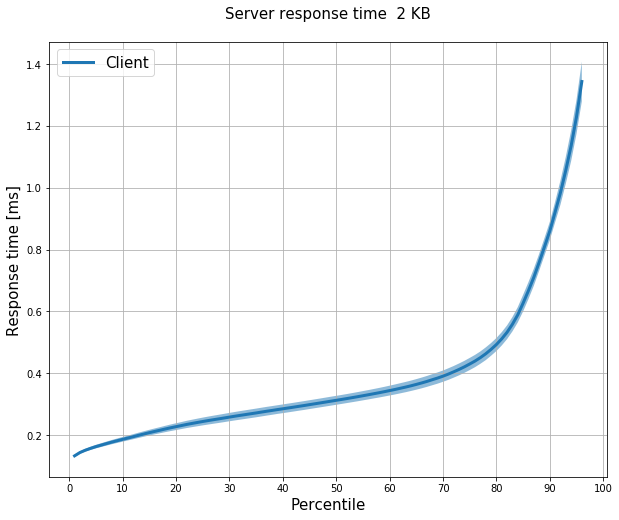

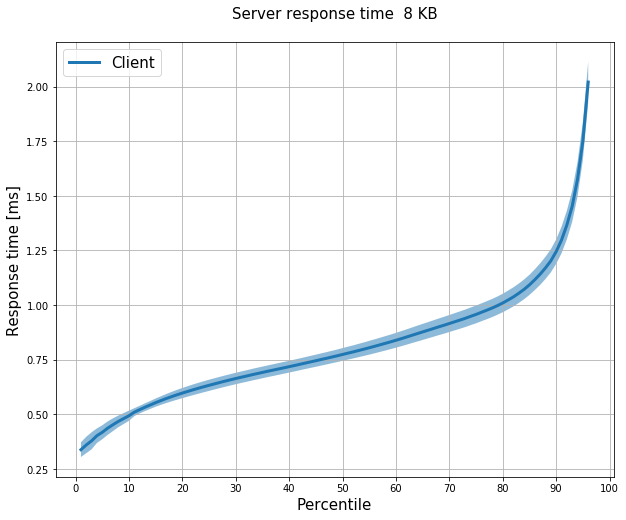

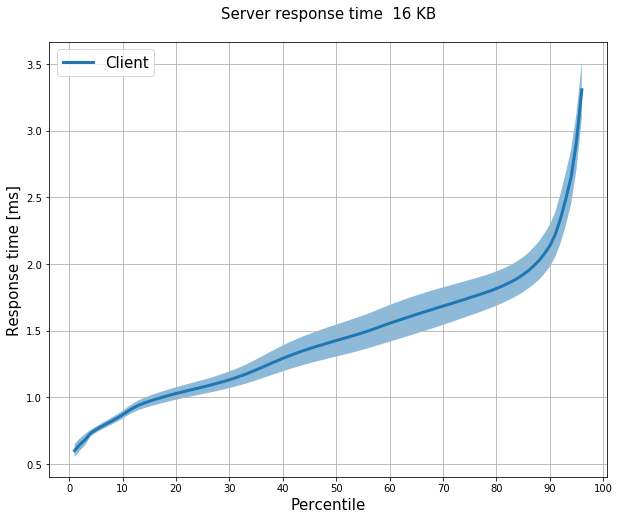

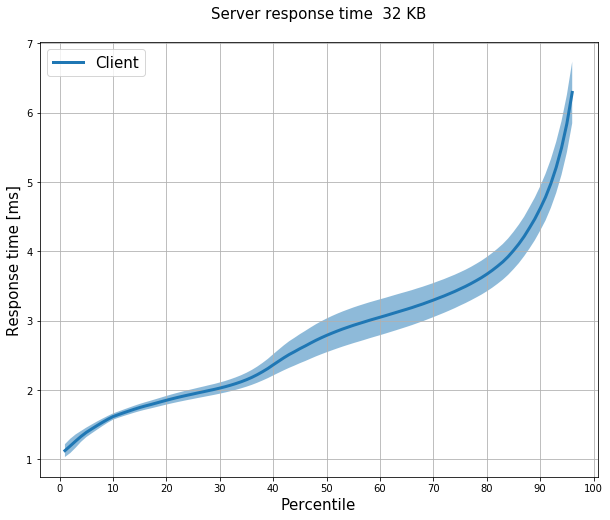

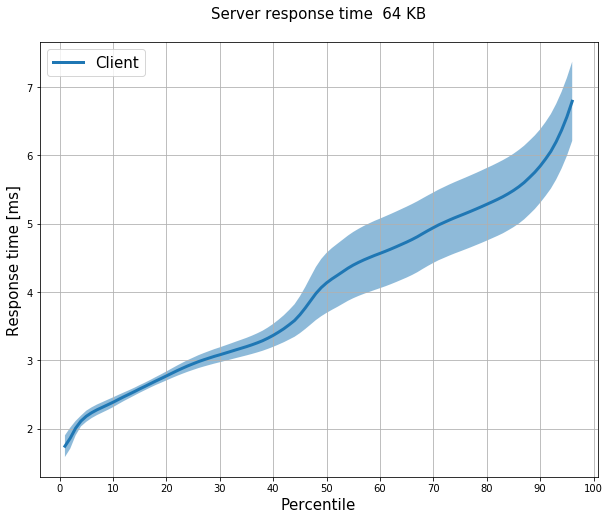

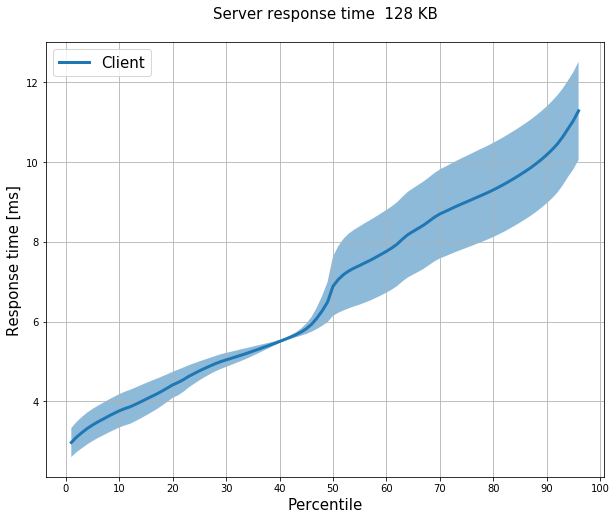

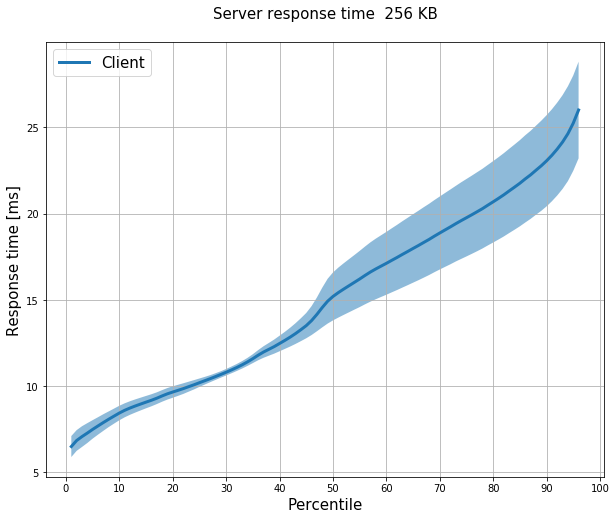

In [191]:
maxPercent = 96
for i in [1,2,8,16,32,64,128,256]:
    client = aggregatePercent("size_log/"+str(i)+"/client/")
    printPlotPercentSingleClient(client, "client response time  "+str(i)+" KB\n")